In [1]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout
import numpy as np

In [4]:
# Load the InceptionV3 model without the top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(350, 350, 3))

# Add new top layers for binary classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='relu')(x)  # For binary classification

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)


In [5]:
# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','mse'])

# Print the model summary
model.summary()



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 350, 350, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 174, 174, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 174, 174, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

In [9]:

# Load the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset2",
    labels='inferred',
    label_mode='binary',
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation='bilinear',
    follow_links=False
)

# Load the validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset2",
    labels='inferred',
    label_mode='binary',
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation='bilinear',
    follow_links=False
)

# Print class names
class_names = train_ds.class_names
print(class_names)

Found 2383 files belonging to 2 classes.
Using 1907 files for training.
Found 2383 files belonging to 2 classes.
Using 476 files for validation.
['No', 'Yes']


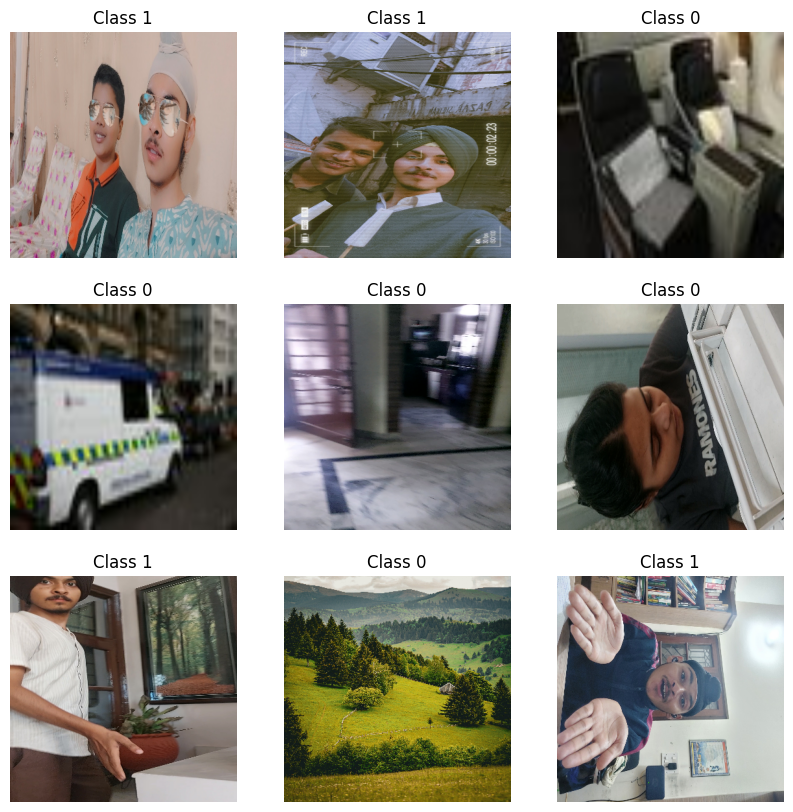

In [7]:
import matplotlib.pyplot as plt
# Function to plot images
def plot_images(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")
    plt.show()

# Get a batch of images and labels
for images, labels in train_ds.take(1):
    # Assuming binary classification, class names could be [0, 1]
    class_names = ['Class 0', 'Class 1']
    plot_images(images, labels, class_names)

In [10]:
# Train the model
epochs = 100
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
    
)

Epoch 1/100
16/60 [=======>......................] - ETA: 5s - loss: 7.8631 - accuracy: 0.4902 - mse: 0.5098

In [ ]:
import matplotlib.pyplot as plt
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()


In [67]:
def visualize_feature_maps(model, layer_name, image):
    from models import Model
    layer_output = model.get_layer(layer_name).output
    intermediate_model = Model(inputs=model.input, outputs=layer_output)
    intermediate_output = intermediate_model.predict(image)

    fig, axes = plt.subplots(8, 8, figsize=(12, 12))
    for i, ax in enumerate(axes.flat):
        if i < intermediate_output.shape[-1]:
            ax.imshow(intermediate_output[0, :, :, i], cmap='viridis')
        ax.axis('off')
    plt.show()


In [68]:
loss, accuracy = model.evaluate(val_ds)

15/15 [==============================] - 3s 119ms/step - loss: 0.0687 - accuracy: 0.9916 - mse: 0.0091


ValueError: too many values to unpack (expected 2)

Found 1908 images belonging to 2 classes.
Found 475 images belonging to 2 classes.


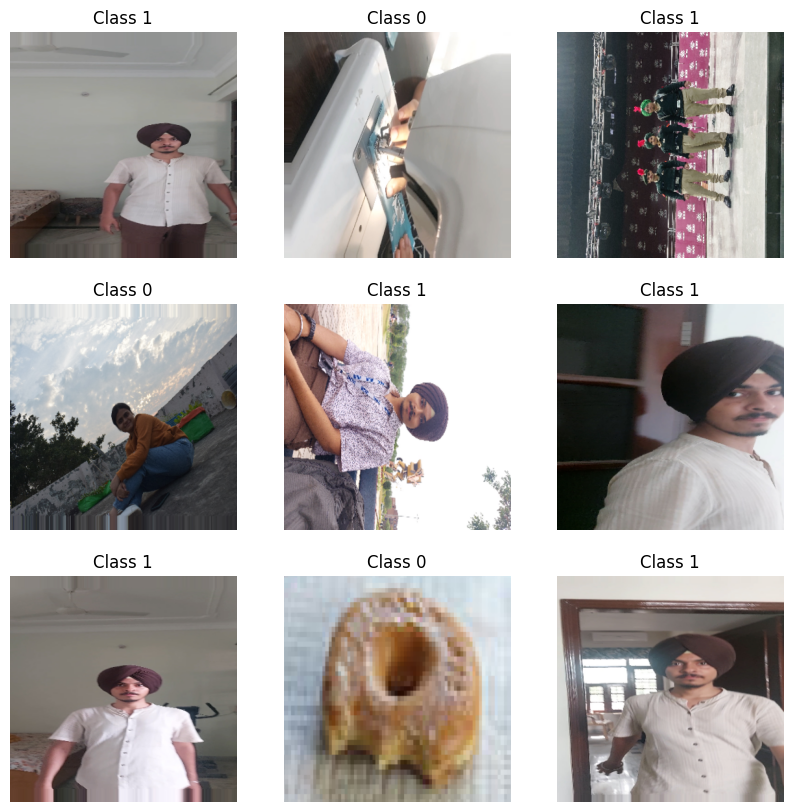

Epoch 1/65
60/60 [==============================] - 80s 1s/step - loss: 0.4334 - accuracy: 0.8538 - mse: 0.1073 - val_loss: 1.2916 - val_accuracy: 0.4947 - val_mse: 0.4266
Epoch 2/65
60/60 [==============================] - 76s 1s/step - loss: 0.1688 - accuracy: 0.9570 - mse: 0.0369 - val_loss: 1.9859 - val_accuracy: 0.4947 - val_mse: 0.4852
Epoch 3/65
60/60 [==============================] - 76s 1s/step - loss: 0.0869 - accuracy: 0.9780 - mse: 0.0177 - val_loss: 2.3137 - val_accuracy: 0.4947 - val_mse: 0.4944
Epoch 4/65
60/60 [==============================] - 78s 1s/step - loss: 0.0628 - accuracy: 0.9864 - mse: 0.0124 - val_loss: 3.2268 - val_accuracy: 0.4947 - val_mse: 0.5032
Epoch 5/65
60/60 [==============================] - 78s 1s/step - loss: 0.0416 - accuracy: 0.9879 - mse: 0.0082 - val_loss: 3.4117 - val_accuracy: 0.4947 - val_mse: 0.5036
Epoch 6/65
60/60 [==============================] - 78s 1s/step - loss: 0.0313 - accuracy: 0.9932 - mse: 0.0051 - val_loss: 4.2192 - val_acc

KeyboardInterrupt: 

In [99]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Load the training dataset with augmentation
train_ds = train_datagen.flow_from_directory(
    "dataset2",
    target_size=(350, 350),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Load the validation dataset without augmentation but with normalization
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

val_ds = val_datagen.flow_from_directory(
    "dataset2",
    target_size=(350, 350),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Function to plot augmented images
def plot_augmented_images(dataset, class_names):
    images, labels = next(dataset)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[int(labels[i])])
        plt.axis("off")
    plt.show()

# Assuming binary classification, class names could be [0, 1]
class_names = ['Class 0', 'Class 1']
plot_augmented_images(train_ds, class_names)

# Load the ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False)

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer
x = Dense(500, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout for regularization

# Add a logistic layer for binary classification
predictions = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Unfreeze the top layers of the base model
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5),
            loss='binary_crossentropy',
            metrics=['accuracy', 'mse'])

# Addressing class imbalance (adjust class weights as needed)
class_weight = {0: 1., 1: 2.}  # Example weights, adjust based on dataset

# Train the model
history = model.fit(train_ds, epochs=65, validation_data=val_ds, class_weight=class_weight)

# Evaluate the model
loss, accuracy, mse = model.evaluate(val_ds)
print(f'Loss: {loss}, Accuracy: {accuracy}, MSE: {mse}')


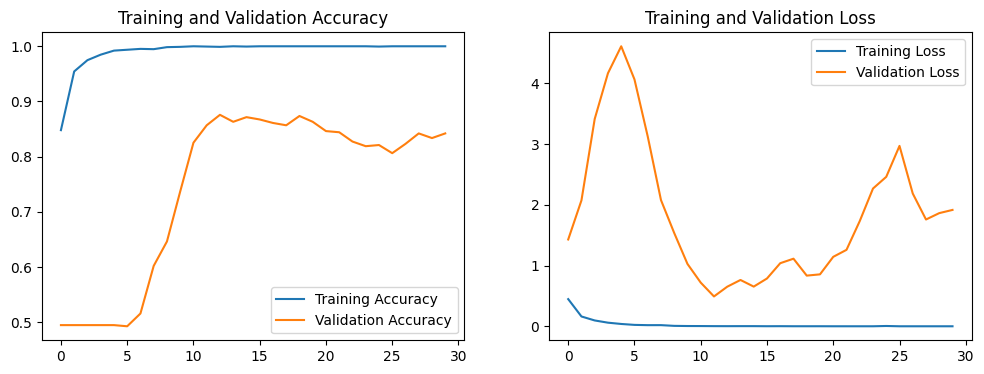

In [85]:
plot_training_history(history)

In [88]:
visualize_feature_maps(base_model, 'conv2d', 'img1.jpg')

ModuleNotFoundError: No module named 'models'

1/1 [==============================] - 0s 15ms/step


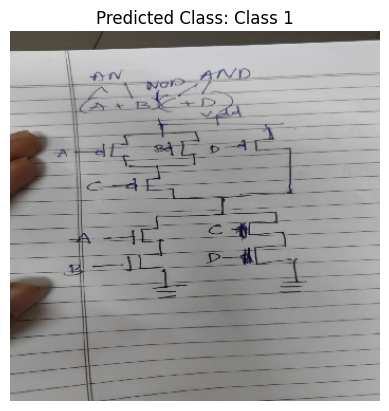

Predicted Class: [1]


In [98]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model (assuming it's already loaded as `model`)
# If not, you can load a saved model using:
# model = tf.keras.models.load_model('path_to_saved_model')

# Function to preprocess and predict an image
def predict_image(img_path, model, target_size=(350, 350)):
    # Load the image
    img = image.load_img(img_path, target_size=target_size)
    # Convert the image to an array
    img_array = image.img_to_array(img)
    # Rescale the image (if needed, depending on your training)
    img_array = img_array / 255.0
    # Expand dimensions to match the input shape (batch_size, height, width, channels)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Predict the class
    prediction = model.predict(img_array)
    
    # Since this is a binary classification problem, use a threshold to determine the class
    threshold = 0.5
    predicted_class = (prediction[0] > threshold).astype(int)
    
    # Plot the image and display the prediction
    plt.imshow(img)
    plt.title(f"Predicted Class: {'Class 1' if predicted_class == 1 else 'Class 0'}")
    plt.axis('off')
    plt.show()

    return predicted_class

# Example usage:
img_path = 'img2.jpg'
predicted_class = predict_image(img_path, model)
print(f"Predicted Class: {predicted_class}")


In [94]:
import numpy as np
img = tf.keras.utils.load_img(
    "dataset1/Yes/20170630_102026.jpg", target_size=(350, 350)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = base_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 1s 540ms/step


IndexError: list index out of range

In [93]:
predictions

array([[[[  0.       , 118.51483  ,   0.       , ...,  25.23014  ,
           80.182625 , 244.87468  ],
         [  0.       ,  46.779724 ,   0.       , ...,   0.       ,
          116.77526  , 234.88055  ],
         [ 74.047    ,   0.       ,   0.       , ...,   0.       ,
           29.699558 , 148.48647  ],
         ...,
         [  0.       ,   0.       ,   0.       , ...,   0.       ,
          104.32532  , 253.27786  ],
         [ 40.15558  ,   4.2284546,   0.       , ...,   0.       ,
          113.49182  , 279.4557   ],
         [212.11578  , 111.389465 ,   0.       , ...,   0.       ,
           64.833    , 144.88104  ]],

        [[  0.       ,   0.       ,   0.       , ...,  18.638002 ,
          164.67947  , 233.54614  ],
         [  0.       ,   0.       ,   4.764298 , ...,   0.       ,
          178.095    , 280.55093  ],
         [  0.       ,   0.       ,   2.9276743, ...,   0.       ,
            0.       , 264.24185  ],
         ...,
         [  0.       ,   0.       

In [55]:
img = tf.keras.utils.load_img(
    'img3.jpg', target_size=(256, 256)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 14ms/step
This image most likely belongs to No with a 100.00 percent confidence.


In [53]:
tf.keras.models.save_model(
    model,"new", overwrite=True
)

INFO:tensorflow:Assets written to: new\assets


INFO:tensorflow:Assets written to: new\assets


In [56]:
import cv2

# Initialize the camera
cap = cv2.VideoCapture(0) # 0 is the index of the built-in camera, change if you have multiple cameras

# Check if the camera opened successfully
if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

# Capture frames from the camera
while True:
    ret, frame = cap.read() # read a frame from the camera

    import numpy as np
    img = tf.keras.utils.load_img(
    "img1.jpg", target_size=(256, 256)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    message = "This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score))


    if not ret:
        print("Error: Can't receive frame (stream end?). Exiting ...")
        break

    # Display the resulting frame
    cv2.imshow(message, frame)

    # Press 'q' to exit the loop
    if cv2.waitKey(1) == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 15ms/step
